In [24]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [25]:
import numpy as np

import tensorflow as tf
import scipy
from tensorflow.keras import layers,Sequential

In [26]:
abnormal_train = os.path.join("D:/Project/train/abnormal")
normal_train = os.path.join("D:/Project/train/normal")

abnormal_test = os.path.join("D:/Project/test/abnormal")
normal_test = os.path.join("D:/Project/test/normal")

In [27]:
train_abnormal_names = os.listdir(abnormal_train)

train_normal_names = os.listdir(normal_train)

test_abnormal_names = os.listdir(abnormal_test)

test_normal_names = os.listdir(normal_test)

In [28]:
print('total training Abnormal images:', len(train_abnormal_names))
print('total training Normal images:', len(train_normal_names))
print('total testing Abnormal images:', len(test_abnormal_names))
print('total testing Normal images:', len(test_normal_names))

total training Abnormal images: 12
total training Normal images: 12
total testing Abnormal images: 4
total testing Normal images: 4


In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 2
ncols = 5

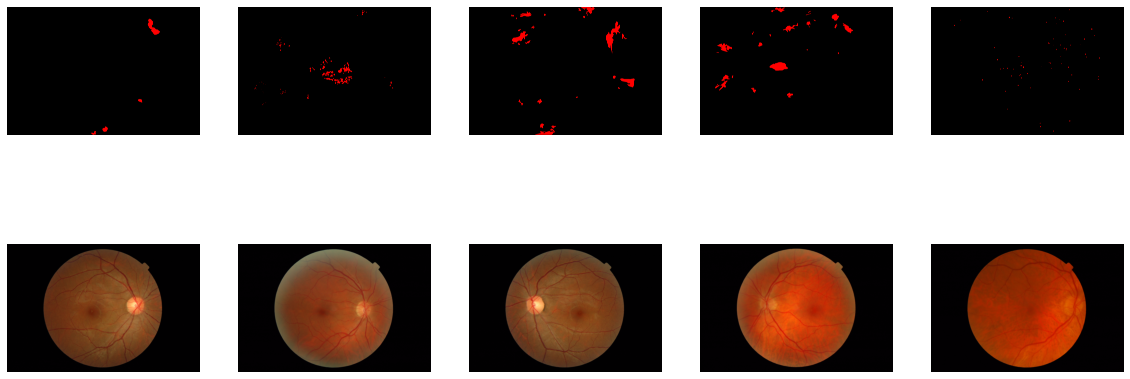

In [30]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

train_abnormal =  [os.path.join(abnormal_train, fname) for fname in np.random.choice(train_abnormal_names, 4, replace=False)]
train_normal =  [os.path.join(normal_train, fname) for fname in np.random.choice(train_normal_names, 4, replace=False)]
test_abnormal = [os.path.join(abnormal_test, str(np.random.choice(test_abnormal_names)))]
test_normal = [os.path.join(normal_test, str(np.random.choice(test_normal_names)))]

for i, img_path in enumerate(train_abnormal + test_abnormal + train_normal + test_normal):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'D:/Data_Science/CNN_prac/train/',  # This is the source directory for training images
        target_size=(800, 800),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


# Flow training images in batches of 128 using train_datagen generator
test_generator = train_datagen.flow_from_directory(
        'D:/Data_Science/CNN_prac/test/',  # This is the source directory for training images
        target_size=(800, 800),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 21 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [32]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(800, 800, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 798, 798, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 399, 399, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 397, 397, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 196, 196, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 128)      

In [34]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.1),
              metrics=['accuracy'])

In [35]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2,  
      epochs=3,
      verbose=1)

Epoch 1/3
2/2 [==============================] - 12s 246ms/step - loss: 0.6936 - accuracy: 0.4762


In [36]:
pred = model.predict_generator(test_generator)

In [37]:
pred.astype(int)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [38]:
test_generator.classes

array([0, 0, 0, 0, 1, 1, 1, 1])

In [39]:
history.history

{'loss': [0.6935907006263733], 'accuracy': [0.4761904776096344]}